In [4]:
# !/usr/bin/env python  
# -*- coding:utf-8 _*-  
""" 
@Author:yanqiang 
@File: 06_autoencoder.py 
@Time: 2018/11/29 10:02
@Software: PyCharm 
@Description: Denoising Autoencoders
"""
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# 参数
batch_size = 128
n_epoch = 20

# 图片维度
img_rows, img_cols = 28, 28
# denoising autoencoder参数
n_visible = img_rows * img_cols
n_hidden = 500
corruption_level = 0.3  # ?

# 加载MNIST数据集
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

# 添加噪声
X_train_noisy = X_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)

# 构建autoencoder 模型
input_img = Input(shape=(n_visible,))
encoded=Dense(n_hidden,activation='relu')(input_img)
decoded=Dense(n_visible,activation='sigmoid')(encoded)

autoencoder=Model(inputs=input_img,outputs=decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.summary()

# 训练
autoencoder.fit(X_train_noisy,X_train,epochs=n_epoch,batch_size=batch_size,
                shuffle=True,verbose=1,validation_data=(X_test_noisy,X_test))

# 评价模型
evaluation=autoencoder.evaluate(X_test_noisy,X_test,batch_size=batch_size,verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % evaluation)
# Summary: Loss over the test dataset: 0.10

(60000, 784)
(10000, 784)
(60000, 784)
(10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2722 - val_loss: 0.2242
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2031 - val_loss: 0.1839
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1738 - 

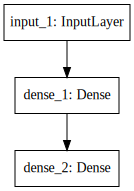

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))